In [1]:
import numpy as numpy
from astropy.io import fits
from astropy.table import Table
from matplotlib.colors import LogNorm
from scipy.stats import gaussian_kde
from scipy.interpolate import *
from pylab import *
from scipy.optimize import curve_fit
import operator
from matplotlib.pyplot import *
%matplotlib inline

In [2]:
from astropy.utils.data import download_file

In [3]:
event_filename = download_file('https://archive.stsci.edu/hlsps/fhufd/hlsp_fhufd_hst_acs_canesvenaticiii_multi_v2.0_cat.fits', cache=True)

In [4]:
hdu_list = fits.open(event_filename, memmap=True)

In [5]:
hdu_list.info()

Filename: C:\Users\veelo\.astropy\cache\download\url\3500a5a89669141bb4598f0276aae1ed\contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  catalog       1 BinTableHDU     27   1R x 6C   [2929D, 2929D, 2929D, 2929D, 2929D, 2929D]   


In [6]:
print(hdu_list[1].columns)

ColDefs(
    name = 'RA'; format = '2929D'; unit = 'degrees'
    name = 'DEC'; format = '2929D'; unit = 'degrees'
    name = 'M606'; format = '2929D'; unit = 'mag'
    name = 'M606ERR'; format = '2929D'; unit = 'mag'
    name = 'M814'; format = '2929D'; unit = 'mag'
    name = 'M814ERR'; format = '2929D'; unit = 'mag'
)


In [7]:
evt_data = Table(hdu_list[1].data)

In [8]:
x = evt_data['M606'] - evt_data['M814']

In [9]:
y = evt_data['M814']

In [10]:
L = sorted(zip(x,y), key=operator.itemgetter(0))

In [11]:
xp, yp = zip(*L)

In [12]:
data = xp,yp

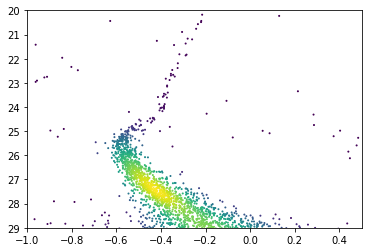

In [18]:
xy = numpy.vstack([xp,yp])
z = gaussian_kde(xy)(xy)

fig, ax = subplots()
ax.scatter(xp, yp, c=z, s=1)
ax = gca()
plt.ylim([20, 29])
plt.xlim([-1, 0.5])
ax.invert_yaxis()

show()